In [1]:
import tensorflow as tf
import os
import numpy as np

In [2]:
dataset = r"G:/breast_cancer_mri"

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2
)

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [20]:
train_gen = train_data.flow_from_directory(
    dataset,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset='training'
) 

validation_gen = validation_data.flow_from_directory(
    dataset,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 625 images belonging to 3 classes.
Found 155 images belonging to 3 classes.


In [5]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [1]:
img_width, img_height = 224, 224
inception = InceptionV3(
    weights = 'imagenet',
    include_top = False,
    input_shape = (img_width, img_height, 3)
)

NameError: name 'InceptionV3' is not defined

In [8]:
for layer in inception.layers:
    layer.trainable = False

In [9]:
x = Flatten()(inception.output)
prediction = Dense(3, activation = 'softmax')(x)
model=Model(inputs = inception.input, outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [11]:
epoch = 20

history = model.fit(train_gen,
                    steps_per_epoch = len(train_gen),
                    epochs = epoch,
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen)
                   )

Epoch 1/20
20/20 [==============================] - 33s 1s/step - loss: 2.1087 - accuracy: 0.6096 - val_loss: 1.2926 - val_accuracy: 0.6387
Epoch 2/20
20/20 [==============================] - 25s 1s/step - loss: 0.7268 - accuracy: 0.7408 - val_loss: 0.6241 - val_accuracy: 0.7032
Epoch 3/20
20/20 [==============================] - 25s 1s/step - loss: 0.4183 - accuracy: 0.8112 - val_loss: 0.7337 - val_accuracy: 0.7290
Epoch 4/20
20/20 [==============================] - 25s 1s/step - loss: 0.3466 - accuracy: 0.8320 - val_loss: 0.5664 - val_accuracy: 0.7548
Epoch 5/20
20/20 [==============================] - 25s 1s/step - loss: 0.2838 - accuracy: 0.8512 - val_loss: 0.6970 - val_accuracy: 0.7613
Epoch 6/20
20/20 [==============================] - 25s 1s/step - loss: 0.2794 - accuracy: 0.8480 - val_loss: 0.5964 - val_accuracy: 0.7419
Epoch 7/20
20/20 [==============================] - 25s 1s/step - loss: 0.3264 - accuracy: 0.8448 - val_loss: 1.0374 - val_accuracy: 0.6645
Epoch 8/20
20/20 [==

In [12]:
score = model.evaluate(validation_gen)

5/5 [==============================] - 5s 897ms/step - loss: 0.8154 - accuracy: 0.7484


In [13]:
score

[0.8154279589653015, 0.7483870983123779]

In [14]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 20}

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
import matplotlib.pyplot as plt

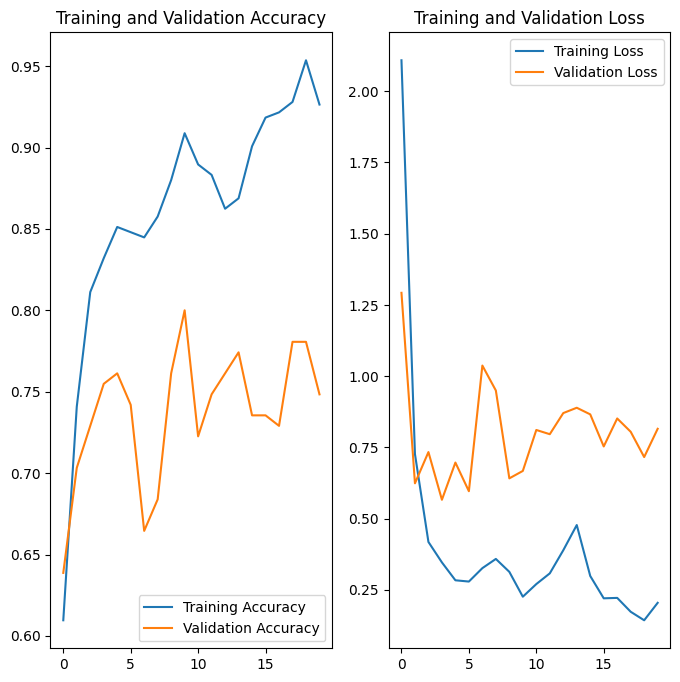

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), acc, label='Training Accuracy')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
model_version = "bc_mri_IV3"
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/bc_mri_IV3\assets
